# Adiabatic Compression in a Rigid Container

## Problem Statement:
A rigid container with 2 kg of oxygen is initially at 1 atm and 25°C. 
The oxygen is compressed adiabatically until the pressure increases to 5 atm. 
Calculate the final temperature, the work done on the gas, and the change in internal energy.

In [1]:
import CoolProp.CoolProp as CP
import math

# Given values
m = 2.0  # Mass of oxygen in kg
T1 = 25 + 273.15  # Initial temperature in Kelvin
P1 = 101325  # Initial pressure in Pa (1 atm)
P2 = 5 * P1  # Final pressure (5 atm)
gamma = CP.PropsSI('Cpmass', 'T', T1, 'P', P1, 'Oxygen') / CP.PropsSI('Cvmass', 'T', T1, 'P', P1, 'Oxygen')  # γ for oxygen

# Final Temperature (T2) for adiabatic process
T2 = T1 * (P2 / P1) ** ((gamma - 1) / gamma)

# Calculate specific volumes V1 and V2 using ideal gas law
R = CP.PropsSI('GAS_CONSTANT', 'Oxygen') / CP.PropsSI('MOLAR_MASS', 'Oxygen')  # Specific gas constant for Oxygen
V1 = m * R * T1 / P1
V2 = m * R * T2 / P2

# Calculate work done (W) during adiabatic process
W = (P1 * V1 - P2 * V2) / (gamma - 1)

# Change in internal energy (ΔU) for adiabatic process
delta_U = -W

# Output the results (W and ΔU in kJ)
print(f"Final Temperature (T2): {round(T2)} K")
print(f"Work done (W): {round(W/1000,1)} kJ")
print(f"Change in internal energy (ΔU): {round(delta_U/1e3,1)} kJ")

Final Temperature (T2): 471 K
Work done (W): -226.3 kJ
Change in internal energy (ΔU): 226.3 kJ


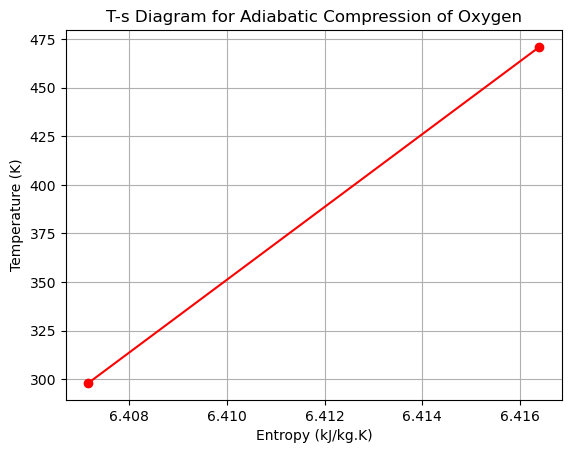

In [2]:
fluid = 'Oxygen'
import matplotlib.pyplot as plt
# Calculate entropy at initial and final states
S1 = CP.PropsSI('S', 'T', T1, 'P', P1, fluid)
S2 = CP.PropsSI('S', 'T', T2, 'P', P2, fluid)
plt.plot([S1 / 1000, S2 / 1000], [T1, T2], 'ro-')  # Adiabatic process
plt.xlabel('Entropy (kJ/kg.K)')
plt.ylabel('Temperature (K)')
plt.title('T-s Diagram for Adiabatic Compression of Oxygen')
plt.grid(True)
plt.show()